In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [53]:
data = pd.read_csv("births.csv")

In [54]:
data.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [55]:
data.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [56]:
data['decade'] = 10 * (data.year // 10)

In [57]:
data.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


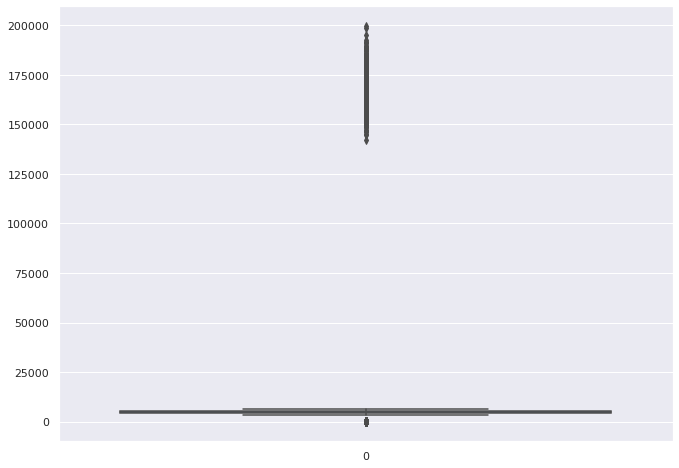

In [58]:
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(data=data.births)

Let's take care of outliers.

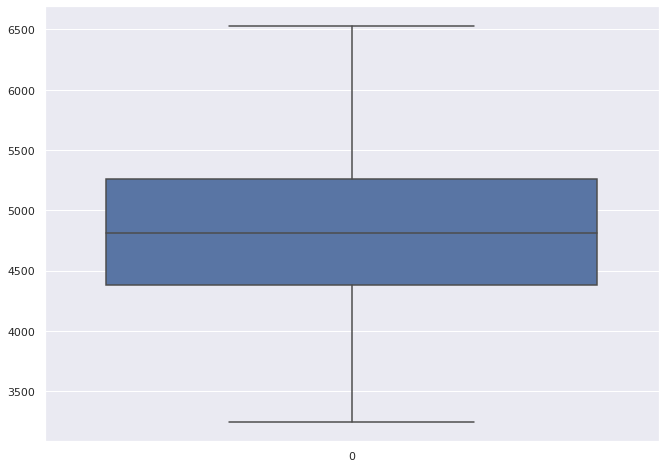

In [63]:
data = data.query('(births > 1000) & (births < 100000)')
fig = plt.figure(figsize=(11, 8))
fig = sns.boxplot(data=data.births)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    14610 non-null  int64  
 1   month   14610 non-null  int64  
 2   day     14610 non-null  float64
 3   gender  14610 non-null  object 
 4   births  14610 non-null  int64  
 5   decade  14610 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.3+ MB


***Days, months and year must be integers.***

In [65]:
for field in ['day', 'month', 'year'] :
    data[field] = data[field].astype(int)


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    14610 non-null  int64 
 1   month   14610 non-null  int64 
 2   day     14610 non-null  int64 
 3   gender  14610 non-null  object
 4   births  14610 non-null  int64 
 5   decade  14610 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


**Extracting days of the week.**

In [78]:
data.index = pd.to_datetime(10_000 * data.year + 100 * data.month + data.day
                           , format = '%Y%m%d')
data['dayofweek'] = data.index.dayofweek

In [79]:
data.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


**And finnaly number of birth per day**

<ipython-input-83-70f44863dfd8>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


<Figure size 792x576 with 0 Axes>

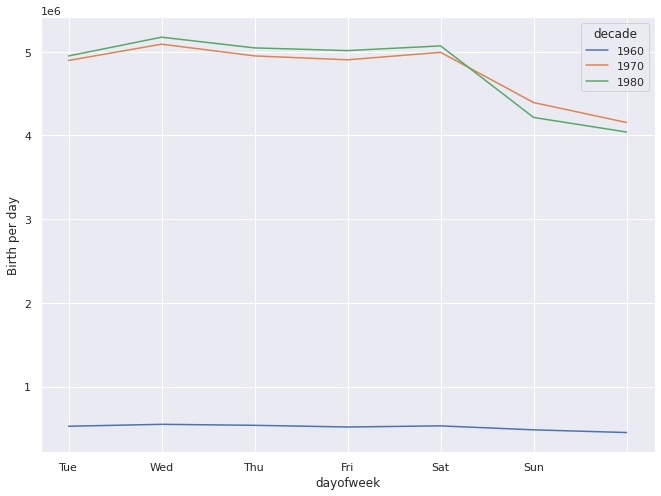

In [83]:
fig = plt.figure(figsize=(11,8))
birth_per_day = data.pivot_table('births',
                                 index='dayofweek',
                                 columns='decade',
                                 aggfunc='sum')
birth_per_day.plot(figsize=(11,8))
plt.gca().set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Birth per day');